In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv("Competition_Data.csv")

In [4]:
print(data)

       Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0          0        2019-11  store_459  item_526  134.49            435   
1          1        2019-11  store_459  item_526  134.49            435   
2          2        2019-11  store_459  item_526  134.49            435   
3          3        2019-11  store_459  item_526  134.49            435   
4          4        2019-11  store_459  item_526  134.49            435   
...      ...            ...        ...       ...     ...            ...   
99995  99995        2019-15  store_197  item_743   94.10            351   
99996  99996        2019-15  store_197  item_743   94.10            351   
99997  99997        2019-15  store_197  item_743   94.10            351   
99998  99998        2019-15  store_197  item_743   94.10            351   
99999  99999        2019-15  store_197  item_743   94.10            351   

       Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                       4716.74 

In [5]:
print(data.head(3))

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  


In [6]:
print(data.columns)

Index(['Index', 'Fiscal_Week_ID', 'Store_ID', 'Item_ID', 'Price',
       'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount',
       'Competition_Price'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [8]:
data.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


In [9]:
import matplotlib.pyplot as plt

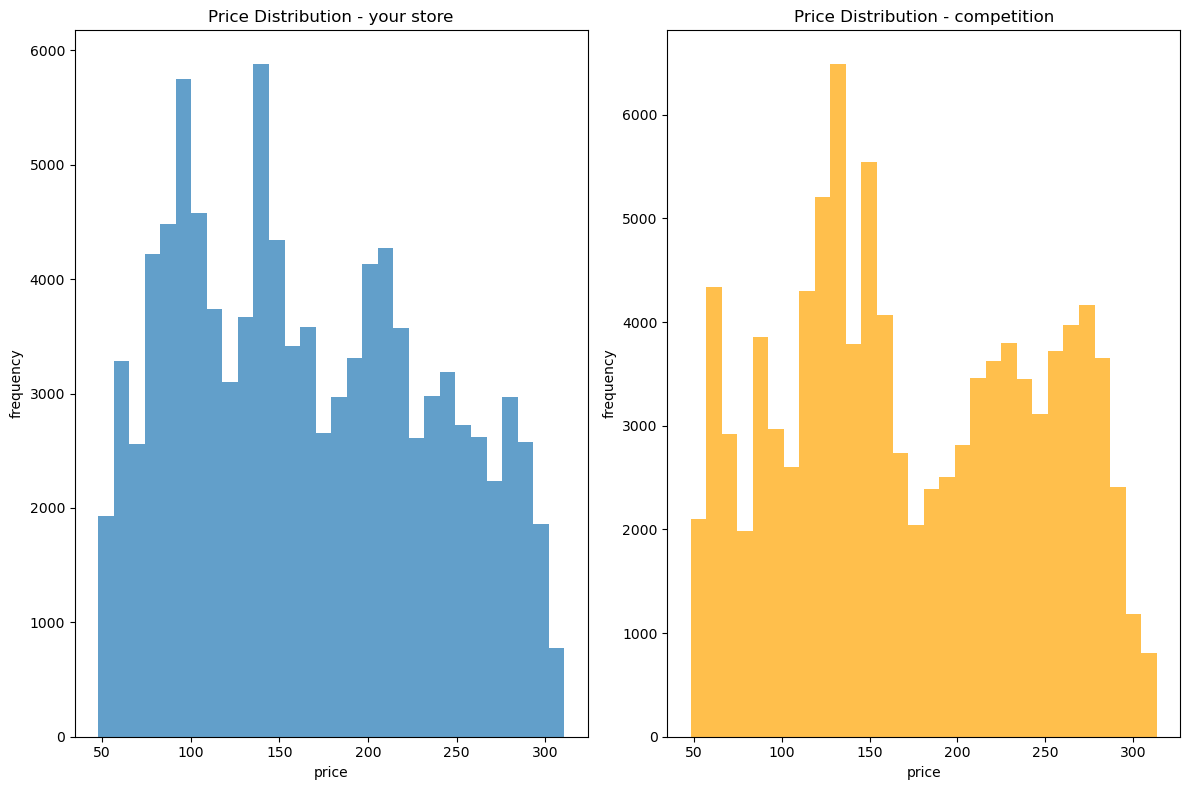

In [10]:
# price distribution with competitor.

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.hist(data['Price'], bins=30, alpha=0.7, label='your store')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution - your store')

plt.subplot(1,2,2)
plt.hist(data['Competition_Price'], bins=30, alpha=0.7, color='orange', label='competition')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution - competition')

plt.tight_layout()
plt.show()

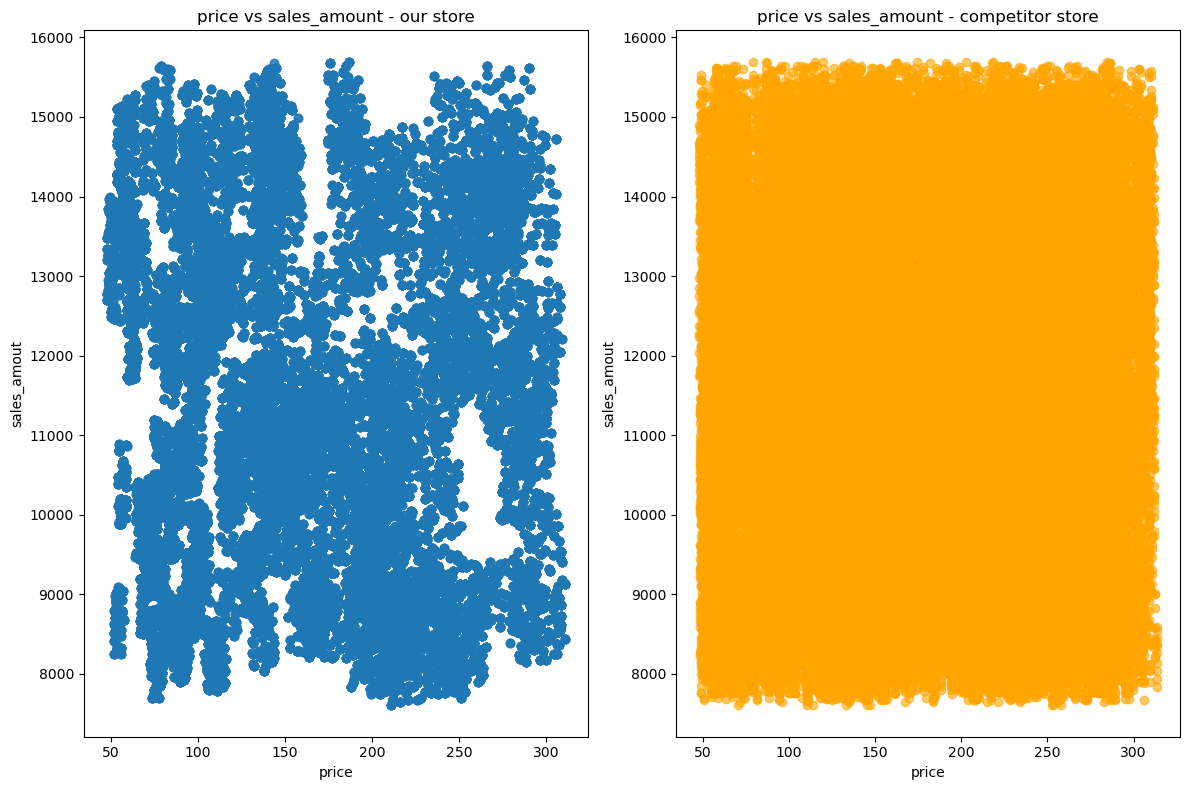

In [11]:
# compare relation between price and sales.
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(data['Price'], data['Sales_Amount'], alpha=0.6, label='your store')
plt.xlabel('price')
plt.ylabel('sales_amout')
plt.title('price vs sales_amount - our store')

plt.subplot(1,2,2)
plt.scatter(data['Competition_Price'], data['Sales_Amount'], alpha=0.6, color='orange', label='competitor store')
plt.xlabel('price')
plt.ylabel('sales_amout')
plt.title('price vs sales_amount - competitor store')

plt.tight_layout()
plt.show()

In [12]:
data["Fiscal_Week_ID"] = pd.to_datetime(data["Fiscal_Week_ID"] + '-1', format='%Y-%U-%w')

In [13]:
print(data["Fiscal_Week_ID"])

0       2019-03-18
1       2019-03-18
2       2019-03-18
3       2019-03-18
4       2019-03-18
           ...    
99995   2019-04-15
99996   2019-04-15
99997   2019-04-15
99998   2019-04-15
99999   2019-04-15
Name: Fiscal_Week_ID, Length: 100000, dtype: datetime64[ns]


In [14]:
Weekly_prices = data.groupby('Fiscal_Week_ID').agg({
    'Price' : 'mean','Competition_Price' : 'mean'}).reset_index()

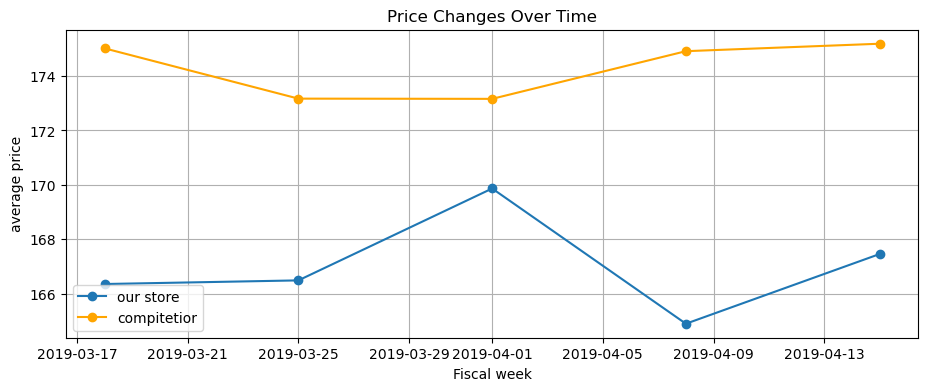

In [15]:
plt.figure(figsize=(11,4))
plt.plot(Weekly_prices['Fiscal_Week_ID'], Weekly_prices['Price'], label='our store', marker = 'o')
plt.plot(Weekly_prices['Fiscal_Week_ID'], Weekly_prices['Competition_Price'], label='compitetior', marker = 'o', color='orange')

plt.xlabel('Fiscal week')
plt.ylabel('average price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
data.columns

Index(['Index', 'Fiscal_Week_ID', 'Store_ID', 'Item_ID', 'Price',
       'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount',
       'Competition_Price'],
      dtype='object')

In [41]:
data["price_change"] = data["Price"].pct_change()
data["qyt_change"] = data["Item_Quantity"].pct_change()

data["elasticity"] = data["qyt_change"]/data["price_change"]
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
data.dropna(subset=['elasticity'], inplace=True)

In [43]:
print(data.head(5))

    Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
10     10     2019-03-18  store_709  item_526  136.79            459   
20     20     2019-03-18  store_442  item_526  138.67            458   
30     30     2019-03-18  store_136  item_526  128.93            459   
40     40     2019-03-18  store_601  item_526  134.45            436   
50     50     2019-03-18  store_458  item_526  134.13            435   

    Sales_Amount_No_Discount  Sales_Amount  Competition_Price  price_change  \
10                   4890.43      11545.08             206.44      0.017102   
20                   4933.46      11517.46             206.44      0.013744   
30                   4962.56      11216.19             206.44     -0.070239   
40                   4704.89      10980.31             206.44      0.042814   
50                   4558.87      11168.10             206.44     -0.002380   

    qyt_change  elasticity  
10    0.055172    3.226147  
20   -0.002179   -0.158520  
30   

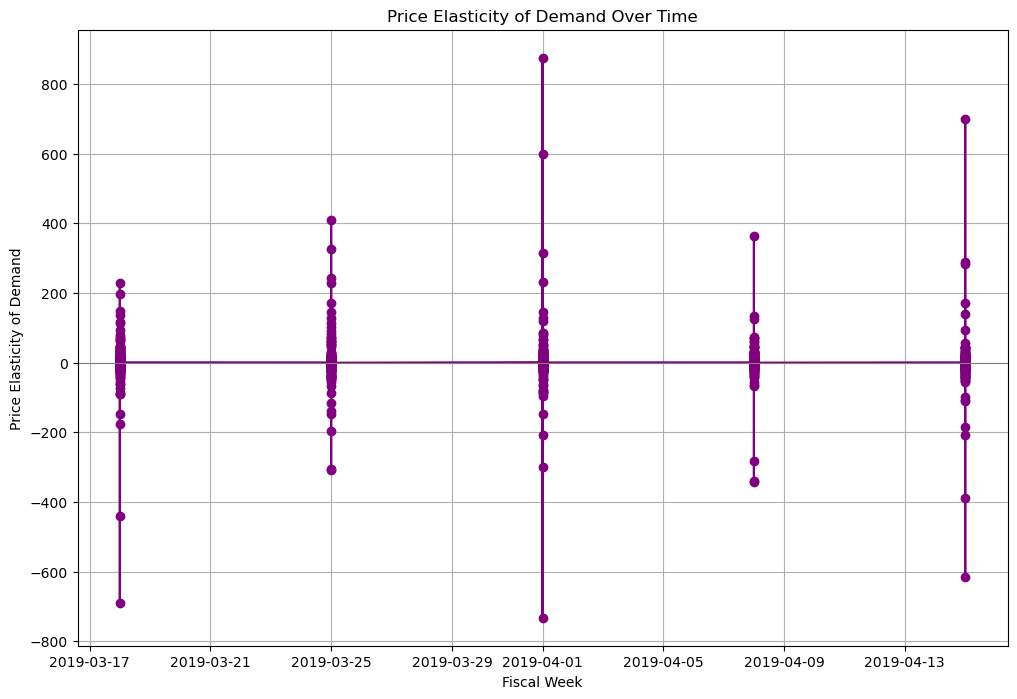

In [47]:
plt.figure(figsize=(12,8))
plt.plot(data['Fiscal_Week_ID'], data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

In [49]:
total_sales_your_store = data['Sales_Amount'].sum()
total_sales_competition = (data['Competition_Price'] * data['Item_Quantity']).sum()

total_qty_your_store = data['Item_Quantity'].sum()
total_qty_competition = data['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})


summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [51]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
data['price_bracket'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)
data['competition_price_bracket'] = pd.cut(data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
data['competition_sales_amt'] = data['Competition_Price'] * data['Item_Quantity']
sales_by_bracket_competition = data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

C:\Users\ritee\AppData\Local\Temp\ipykernel_18340\2128408817.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
C:\Users\ritee\AppData\Local\Temp\ipykernel_18340\2128408817.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [57]:
pricing_data = data.copy()

In [61]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

ValueError: Input array must be 1 dimensional

In [63]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [65]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [67]:
pricing_data

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,...,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,Price_avg,Item_Quantity_avg,Price_avg,Item_Quantity_avg,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,...,201-250,94755.96,132.061224,21792,Medium,132.061224,21792,132.061224,21792,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,...,201-250,94549.52,132.061224,21792,Medium,132.061224,21792,132.061224,21792,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,...,201-250,94755.96,132.061224,21792,Medium,132.061224,21792,132.061224,21792,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,...,201-250,90007.84,132.061224,21792,Medium,132.061224,21792,132.061224,21792,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,...,201-250,89801.40,132.061224,21792,Medium,132.061224,21792,132.061224,21792,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99975,2019-04-15,store_458,item_743,98.89,353,2666.83,10299.90,52.93,-0.016607,...,51-100,18684.29,96.454200,41886,Medium,96.454200,41886,96.454200,41886,103.8345
9987,99980,2019-04-15,store_162,item_743,94.97,343,2472.23,9981.52,52.93,-0.039640,...,51-100,18154.99,96.454200,41886,Medium,96.454200,41886,96.454200,41886,99.7185
9988,99985,2019-04-15,store_30,item_743,92.61,364,2524.88,10346.17,52.93,-0.024850,...,51-100,19266.52,96.454200,41886,Medium,96.454200,41886,96.454200,41886,97.2405
9989,99990,2019-04-15,store_594,item_743,100.41,367,2620.04,10682.56,52.93,0.084224,...,51-100,19425.31,96.454200,41886,Medium,96.454200,41886,96.454200,41886,105.4305


The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue.